In [1]:
#这个lgb只放re和cnt，不放所有的类别信息

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import lightgbm as lgb
import datetime 
import math 
import gc
import os

In [2]:
#输入文件
DATA_PATH = os.path.join(os.getcwd(),'data','simply_id','input')
NEW_TRAIN  =  os.path.join(DATA_PATH,'new_train.csv')
NEW_TEST = os.path.join(DATA_PATH,'new_test.csv')

In [3]:
train = pd.read_csv(NEW_TRAIN)
test = pd.read_csv(NEW_TEST)

In [4]:
train.drop(['msno', 'song_id', 'op_type', 'city', 'registered_via',
       'registration_init_time', 'song_length', 'song_year', 'first_genre_id',
       'artist_name_id', 'lyricist_id', 'language_id'],axis = 1,inplace = True)
test.drop(['msno', 'song_id', 'op_type', 'city', 'registered_via',
       'registration_init_time', 'song_length', 'song_year', 'first_genre_id',
       'artist_name_id', 'lyricist_id', 'language_id'],axis = 1,inplace = True)

In [5]:
for col in train.columns:
    if train[col].dtype == object:
        train[col] = train[col].astype('category')
for col in test.columns:
    if test[col].dtype == object:
        test[col] = test[col].astype('category')

In [6]:
X_train = train.drop(['target'], axis=1).values
y_train = train['target'].values
X_test = test.drop(['target'], axis=1).values
y_test = test['target'].values

In [7]:
d_train_final = lgb.Dataset(X_train, y_train)
watchlist_final = lgb.Dataset(X_test, y_test)

In [8]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.1,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.9,
        'bagging_freq': 2,
        'bagging_seed': 3,
        'feature_fraction': 0.8,
        'feature_fraction_seed': 2,
        'max_bin': 256,
        'max_depth': 30,
        'num_rounds': 500,
        'metric' : 'auc',
        'using_missing' : False,
        'is_unbalance' : True
        #'sigmoid' : 1.0 ,
        #'train_metric' : True
    }

In [9]:
%time model_f1 = lgb.train(params, train_set=d_train_final,  valid_sets=watchlist_final,verbose_eval=5)

D:\Users\10100\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's auc: 0.750876
[10]	valid_0's auc: 0.751726
[15]	valid_0's auc: 0.753034
[20]	valid_0's auc: 0.753851
[25]	valid_0's auc: 0.754685
[30]	valid_0's auc: 0.755478
[35]	valid_0's auc: 0.756308
[40]	valid_0's auc: 0.757042
[45]	valid_0's auc: 0.757661
[50]	valid_0's auc: 0.758194
[55]	valid_0's auc: 0.758793
[60]	valid_0's auc: 0.759392
[65]	valid_0's auc: 0.759984
[70]	valid_0's auc: 0.760448
[75]	valid_0's auc: 0.76085
[80]	valid_0's auc: 0.761266
[85]	valid_0's auc: 0.76152
[90]	valid_0's auc: 0.761876
[95]	valid_0's auc: 0.76236
[100]	valid_0's auc: 0.762723
[105]	valid_0's auc: 0.76293
[110]	valid_0's auc: 0.763206
[115]	valid_0's auc: 0.763547
[120]	valid_0's auc: 0.763749
[125]	valid_0's auc: 0.764056
[130]	valid_0's auc: 0.764264
[135]	valid_0's auc: 0.764472
[140]	valid_0's auc: 0.764677
[145]	valid_0's auc: 0.764856
[150]	valid_0's auc: 0.765087
[155]	valid_0's auc: 0.765309
[160]	valid_0's auc: 0.765584
[165]	valid_0's auc: 0.765676
[170]	valid_0's auc: 0.765921
[175

In [10]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'dart',
        'learning_rate': 0.1,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.9,
        'bagging_freq': 2,
        'bagging_seed': 3,
        'feature_fraction': 0.8,
        'feature_fraction_seed': 2,
        'max_bin': 256,
        'max_depth': 30,
        'num_rounds': 500,
        'metric' : 'auc',
        'using_missing' : False,
        'sigmoid' : 1.0 ,
        #'train_metric' : True
    }

In [11]:
%time model_f2 = lgb.train(params, train_set=d_train_final,  valid_sets=watchlist_final, verbose_eval=5)

D:\Users\10100\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's auc: 0.750795
[10]	valid_0's auc: 0.751752
[15]	valid_0's auc: 0.752789
[20]	valid_0's auc: 0.753526
[25]	valid_0's auc: 0.754042
[30]	valid_0's auc: 0.754695
[35]	valid_0's auc: 0.755199
[40]	valid_0's auc: 0.755668
[45]	valid_0's auc: 0.756039
[50]	valid_0's auc: 0.756323
[55]	valid_0's auc: 0.756591
[60]	valid_0's auc: 0.756831
[65]	valid_0's auc: 0.757055
[70]	valid_0's auc: 0.757298
[75]	valid_0's auc: 0.757372
[80]	valid_0's auc: 0.75753
[85]	valid_0's auc: 0.757591
[90]	valid_0's auc: 0.757698
[95]	valid_0's auc: 0.757853
[100]	valid_0's auc: 0.75798
[105]	valid_0's auc: 0.757962
[110]	valid_0's auc: 0.757995
[115]	valid_0's auc: 0.758215
[120]	valid_0's auc: 0.758417
[125]	valid_0's auc: 0.758612
[130]	valid_0's auc: 0.75873
[135]	valid_0's auc: 0.758833
[140]	valid_0's auc: 0.758841
[145]	valid_0's auc: 0.758929
[150]	valid_0's auc: 0.758916
[155]	valid_0's auc: 0.759062
[160]	valid_0's auc: 0.758987
[165]	valid_0's auc: 0.759082
[170]	valid_0's auc: 0.75936
[175

In [12]:
import math
print('Making predictions')

p_test_1 = model_f1.predict(X_test)
p_test_2 = model_f2.predict(X_test)
p_test_avg = np.mean([p_test_1, p_test_2], axis = 0).round()

p_train_1 = model_f1.predict(X_train)
p_train_2 = model_f2.predict(X_train)
p_train_avg = np.mean([p_train_1, p_train_2], axis = 0).round()

Making predictions


In [13]:
#模型评价
from sklearn import metrics
pre_rate = metrics.roc_auc_score(y_train,model_f1.predict(X_train).round())
print(pre_rate)

0.713819745838


In [14]:
pre_rate2 = metrics.roc_auc_score(y_train,model_f1.predict(X_train))
print(pre_rate2)

0.788392937011


In [15]:
#模型评价
from sklearn import metrics
from scipy import interp 
cm_train = metrics.confusion_matrix(y_train,model_f1.predict(X_train).round())  #训练样本的混淆矩阵
print(cm_train)
cm_test = metrics.confusion_matrix(y_test,model_f1.predict(X_test).round())  #训练样本的混淆矩阵
print(cm_test)

[[1655851  617478]
 [ 780282 1814240]]
[[407921 160089]
 [202254 446699]]


In [16]:
#模型评价
from sklearn import metrics
from scipy import interp 
cm_train = metrics.confusion_matrix(y_train,model_f2.predict(X_train).round())  #训练样本的混淆矩阵
print(cm_train)
cm_test = metrics.confusion_matrix(y_test,model_f2.predict(X_test).round())  #训练样本的混淆矩阵
print(cm_test)

[[1531420  741909]
 [ 687479 1907043]]
[[378455 189555]
 [177058 471895]]


In [17]:
#模型评价
from sklearn import metrics
from scipy import interp 
cm_train = metrics.confusion_matrix(y_train,p_train_avg)  #训练样本的混淆矩阵
print(cm_train)
cm_test = metrics.confusion_matrix(y_test,p_test_avg)  #训练样本的混淆矩阵
print(cm_test)

[[1597118  676211]
 [ 733250 1861272]]
[[394029 173981]
 [189379 459574]]


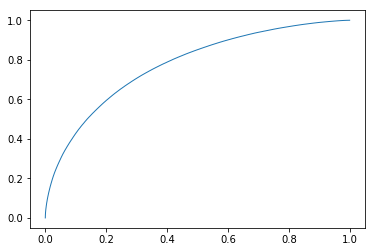

In [18]:
#roc曲线
fpr, tpr, thresholds = metrics.roc_curve(y_test, p_test_1,pos_label = 1)##指定正例标签，pos_label = ###########在数之联的时候学到的，要制定正例 
mean_fpr = np.linspace(0, 1, 100) 
mean_tpr = 0.0 #初始处为0 
mean_tpr += interp(mean_fpr, fpr, tpr)          #对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数    
                                 
roc_auc = metrics.auc(fpr, tpr)    
#画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来    
plt.plot(fpr, tpr, lw=1, label='ROC  (area = %0.3f)' % roc_auc) 
plt.show()